# Feature Engineering 

* By - Gautam Sharma

# I. Import all require libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import pickle
import os

In [2]:
# set plot style
sns.set(color_codes=True)

In [3]:
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

# Load data into DataFrame

In [4]:
data_hist = pd.read_csv('ml_history_processed.csv')
data_train = pd.read_csv('train.csv')

In [5]:
data_hist.head(5)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


# Feature Engineering

 **We will create new features last six months , and the last 3 months our model.**

In [6]:
mean_year = data_hist.groupby(['id']).mean().reset_index()

In [7]:
mean_6m = data_hist[data_hist['price_date']> '2015-06-01'].groupby(['id']).mean().reset_index()

In [8]:
mean_3m = data_hist[data_hist['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

## Combine all of them in single DataFrame

In [9]:
mean_year = mean_year.rename(index=str, columns={
    'price_p1_var':'mean_year_price_p1_var',
    'price_p2_var':'mean_year_price_p2_var',
    'price_p3_var':'mean_year_price_p3_var',
    'price_p1_fix':'mean_year_price_p1_fix',
    'price_p2_fix':'mean_year_price_p2_fix',
    'price_p3_fix':'mean_year_price_p3_fix',
    
})

In [10]:
mean_year['mean_year_price_p1'] = mean_year['mean_year_price_p1_var'] + mean_year['mean_year_price_p1_fix']
mean_year['mean_year_price_p2'] = mean_year['mean_year_price_p2_var'] + mean_year['mean_year_price_p2_fix']
mean_year['mean_year_price_p3'] = mean_year['mean_year_price_p3_var'] + mean_year['mean_year_price_p3_fix']

In [11]:
# For 6 months mean_6m
mean_6m = mean_6m.rename(index=str, columns={
    'price_p1_var':'mean_6m_price_p1_var',
    'price_p2_var':'mean_6m_price_p2_var',
    'price_p3_var':'mean_6m_price_p3_var',
    'price_p1_fix':'mean_6m_price_p1_fix',
    'price_p2_fix':'mean_6m_price_p2_fix',
    'price_p3_fix':'mean_6m_price_p3_fix',
    
})

In [12]:
mean_6m['mean_6m_price_p1'] = mean_6m['mean_6m_price_p1_var'] + mean_6m['mean_6m_price_p1_fix']
mean_6m['mean_6m_price_p2'] = mean_6m['mean_6m_price_p2_var'] + mean_6m['mean_6m_price_p2_fix']
mean_6m['mean_6m_price_p3'] = mean_6m['mean_6m_price_p3_var'] + mean_6m['mean_6m_price_p3_fix']

In [13]:
# For 3 months mean_3m
mean_3m = mean_3m.rename(index=str, columns={
    'price_p1_var':'mean_3m_price_p1_var',
    'price_p2_var':'mean_3m_price_p2_var',
    'price_p3_var':'mean_3m_price_p3_var',
    'price_p1_fix':'mean_3m_price_p1_fix',
    'price_p2_fix':'mean_3m_price_p2_fix',
    'price_p3_fix':'mean_3m_price_p3_fix',
    
})

In [14]:
mean_3m['mean_3m_price_p1'] = mean_3m['mean_3m_price_p1_var'] + mean_3m['mean_3m_price_p1_fix']
mean_3m['mean_3m_price_p2'] = mean_3m['mean_3m_price_p2_var'] + mean_3m['mean_3m_price_p2_fix']
mean_3m['mean_3m_price_p3'] = mean_3m['mean_3m_price_p3_var'] + mean_3m['mean_3m_price_p3_fix']

* Now we will mwrge them into a single dataframe

In [15]:
features = mean_year

# Feature Engineering

In [16]:
data_train.head(5)

,Unnamed: 0,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


## Transforming boolean data

In [17]:
data_train['has_gas'] = data_train['has_gas'].replace(['t','f'],[1,0])

## Categorical Data And Dummy Variables

In [18]:
data_train['channel_sales'] = data_train['channel_sales'].fillna('null_values_channel')

In [19]:
# Transform to categorical data type
data_train["channel_sales"] = data_train["channel_sales"].astype("category")


**We want to see how many categories we will end up with**

In [20]:
pd.DataFrame({"Samples in category": data_train["channel_sales"].value_counts()})


,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [21]:
# Create dummy variables
categories_channel = pd.get_dummies(data_train['channel_sales'],prefix='channel')

In [22]:
# Rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [23]:
categories_channel.head()

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [24]:
categories_channel.drop(columns=['channel_nul'], inplace=True)

# Categorical Data
* First of all let's replace the NAN values with a string called null_values_origin

In [25]:
data_train['origin_up'] = data_train['origin_up'].fillna('null_values_origin')

**Now transform the origin_up column into categorical data type**

In [26]:
data_train['origin_up'] = data_train['origin_up'].astype('category')

**How many categories**

In [27]:
pd.DataFrame({'Samples in category': data_train['origin_up'].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [28]:
# Create dummy variables
categories_origin = pd.get_dummies(data_train['origin_up'], prefix = 'origin')

In [29]:
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [30]:
categories_origin.head(5)

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


**Finally remove one column to avoid the dummy variable trap**

## Categorical data - Feature Engineering

**First of all let's replce the NAN values with a sting called null_values_activity**

In [31]:
categories_activity = pd.DataFrame({'Activity samples':data_train['activity_new'].value_counts()})

In [32]:
categories_activity

,Activity samples
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
ckfxocssowaeipxueikxcmaxdmcduxsa,189
...,...
exmccxcauwolkacaceedipbcmodfedfl,1
akakmkfwoesfipbpaodfippfklpkuxdd,1
beplffiwdfsmiuodulsfscelscscbdix,1
dbklukmppmseoekmmxfolmfbdidmawls,1


**As we can see below there are too many categories with vary few number of samples. So we will replace any category with less than 75 null_values_category**

In [33]:
# Get the categories with less than 75 samples
to_replace = list(categories_activity[categories_activity["Activity samples"] <= 75].index)
# Replace them with `null_values_categories`
data_train["activity_new"]=data_train["activity_new"].replace(to_replace,"null_values_activity")


In [34]:
# Create dummy variables
categories_activity = pd.get_dummies(data_train["activity_new"], prefix = "activity")
# Rename columns for simplicity
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]


In [35]:
categories_activity.head(3)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0


**Finally remove one column to avoid the dummy variable trap**

In [36]:
categories_activity.drop(columns=['activity_nul'], inplace=True)

**Merge dummy variables to main dataframe**

In [37]:
# Use common index to merge
train_new = pd.merge(data_train, categories_channel, left_index=True, right_index=True)
train_new = pd.merge(data_train, categories_origin, left_index=True, right_index=True)
train_new = pd.merge(data_train, categories_activity, left_index=True, right_index=True)

In [38]:
train_new.drop(columns=["channel_sales", "origin_up", "activity_new"],inplace=True)

In [39]:
train_new.describe()

,Unnamed: 0,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,16096.000000,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,8047.500000,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,0.184145,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,4646.659302,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,0.387615,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,0.000000,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4023.750000,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8047.500000,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,0.000000,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12071.250000,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,0.000000,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16095.000000,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Remove the negative values**

In [40]:
train_new.loc[train_new.cons_12m < 0,"cons_12m"] = np.nan
train_new.loc[train_new.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
train_new.loc[train_new.cons_last_month < 0,"cons_last_month"] = np.nan
train_new.loc[train_new.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
train_new.loc[train_new.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train_new.loc[train_new.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
train_new.loc[train_new.imp_cons < 0,"imp_cons"] = np.nan


**Apply the Log10 Transformation**

In [41]:
train_new["cons_12m"] = np.log10(train_new["cons_12m"]+1)
train_new["cons_gas_12m"] = np.log10(train_new["cons_gas_12m"]+1)
train_new["cons_last_month"] = np.log10(train_new["cons_last_month"]+1)
train_new["forecast_cons_12m"] = np.log10(train_new["forecast_cons_12m"]+1)
train_new["forecast_cons_year"] = np.log10(train_new["forecast_cons_year"]+1)
train_new["forecast_meter_rent_12m"] = np.log10(train_new["forecast_meter_rent_12m"]+1)
train_new["imp_cons"] = np.log10(train_new["imp_cons"]+1)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


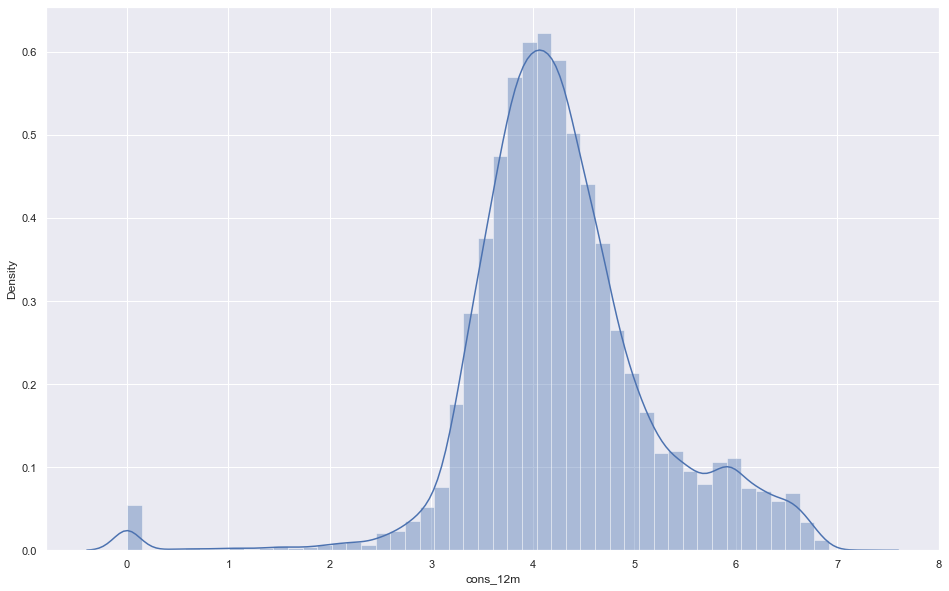

In [42]:
fig = plt.subplots(figsize=(16,10))
sns.distplot((train_new["cons_12m"].dropna()))


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


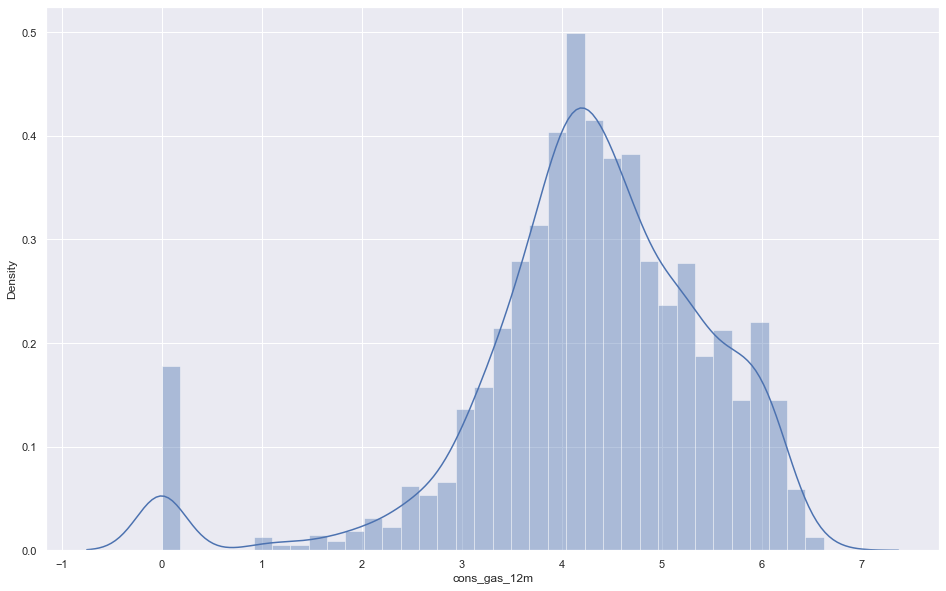

In [43]:
fig = plt.subplots(figsize=(16,10))
sns.distplot((train_new[train_new["has_gas"]==1]["cons_gas_12m"].dropna()))


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


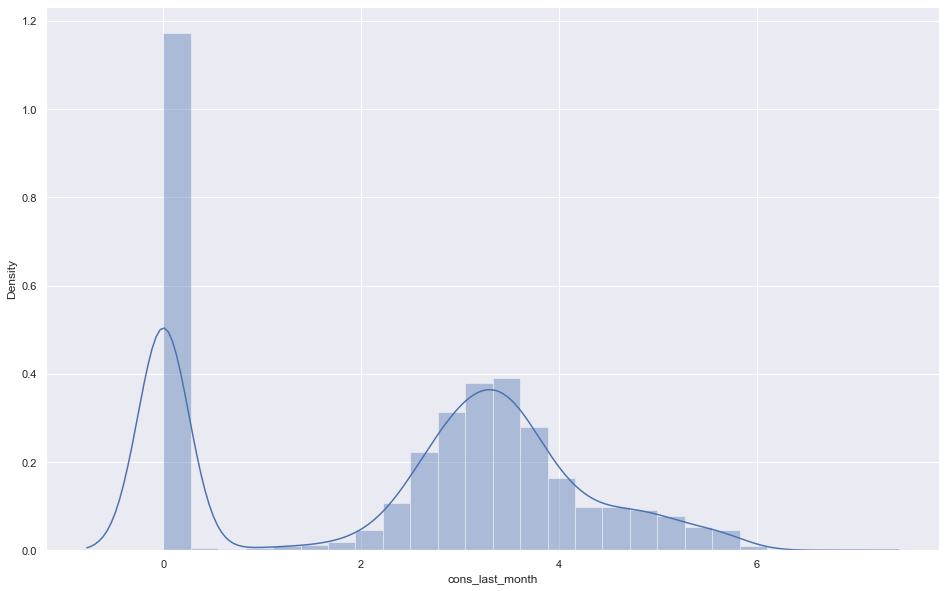

In [44]:
fig = plt.subplots(figsize=(16,10))
sns.distplot((train_new["cons_last_month"].dropna()))


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


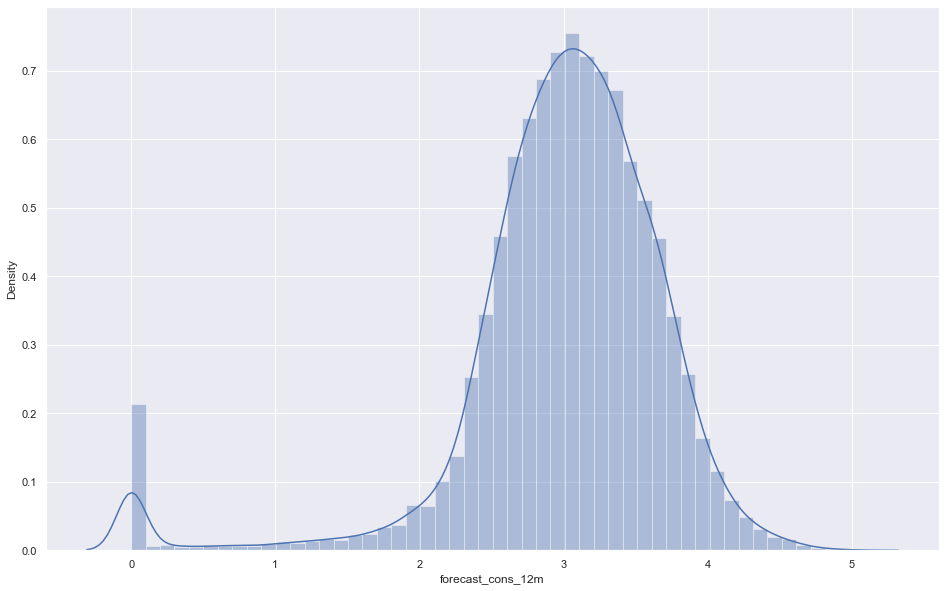

In [45]:
fig = plt.subplots(figsize=(16,10))
sns.distplot((train_new["forecast_cons_12m"].dropna()))


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


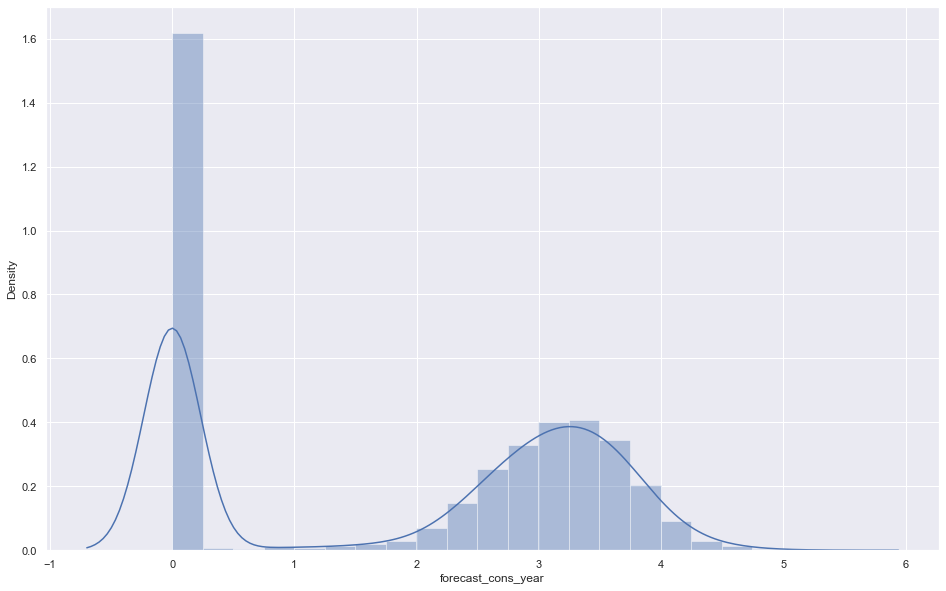

In [46]:
fig = plt.subplots(figsize=(16,10))
sns.distplot((train_new["forecast_cons_year"].dropna()))


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


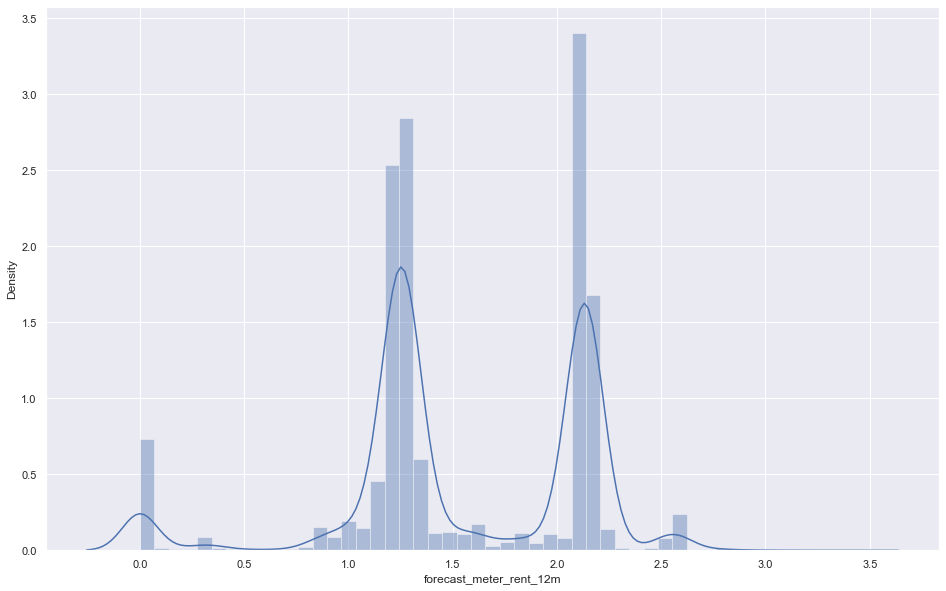

In [47]:
fig = plt.subplots(figsize=(16,10))
sns.distplot((train_new["forecast_meter_rent_12m"].dropna()))


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


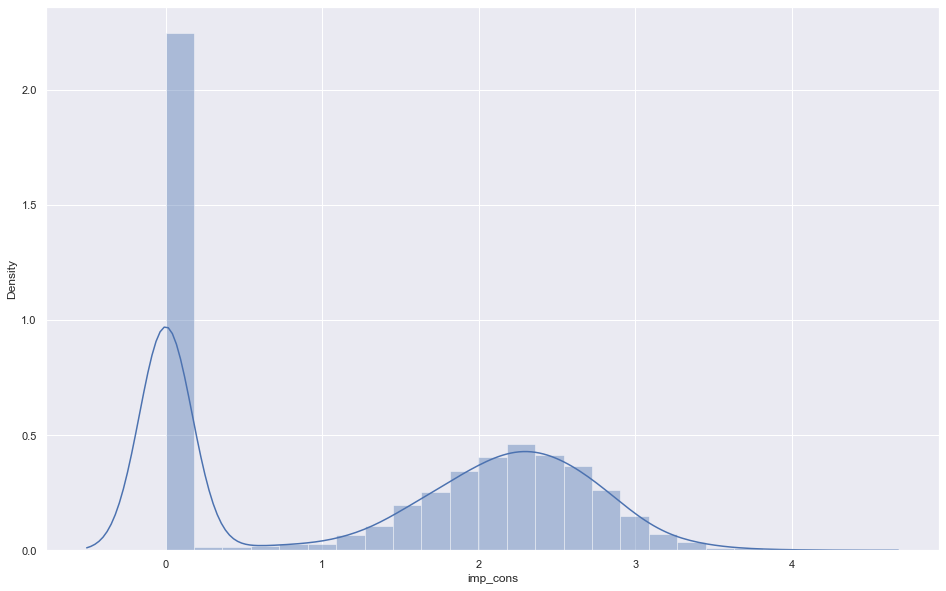

In [48]:
fig = plt.subplots(figsize=(16,10))
sns.distplot((train_new["imp_cons"].dropna()))
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


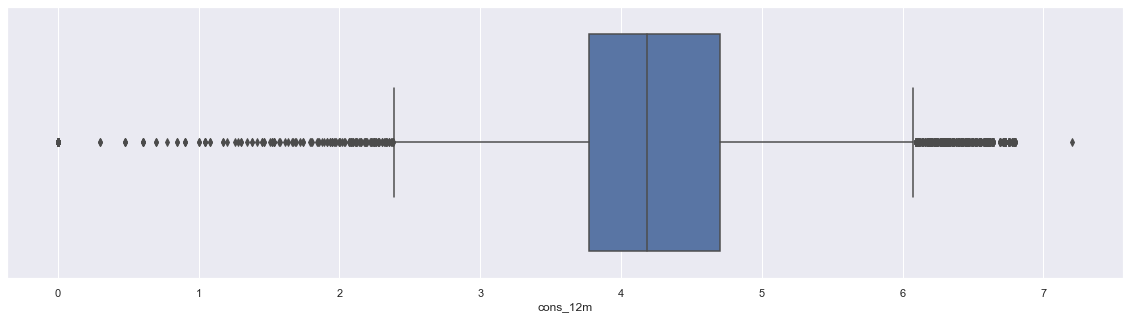

In [49]:
fig = plt.subplots( figsize=(20,5))
# Plot boxplots
sns.boxplot((train_new["cons_12m"].dropna()))
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


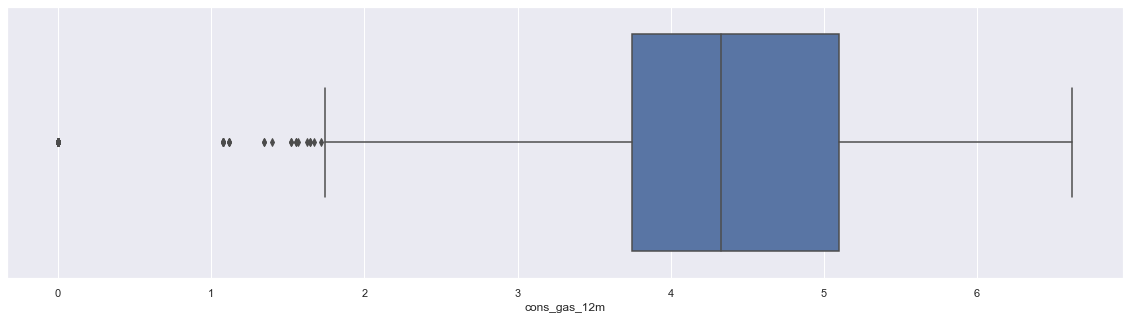

In [50]:
fig = plt.subplots( figsize=(20,5))
sns.boxplot((train_new[train_new["has_gas"]==1]["cons_gas_12m"].dropna()))
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


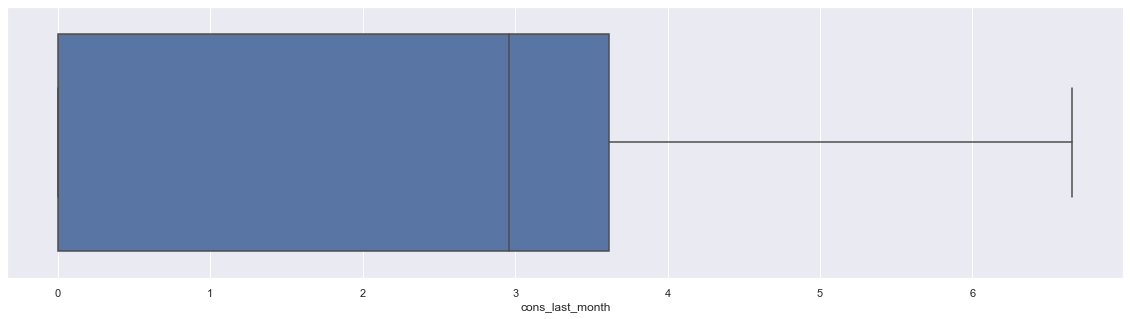

In [51]:
fig = plt.subplots( figsize=(20,5))
sns.boxplot((train_new["cons_last_month"].dropna()))

plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


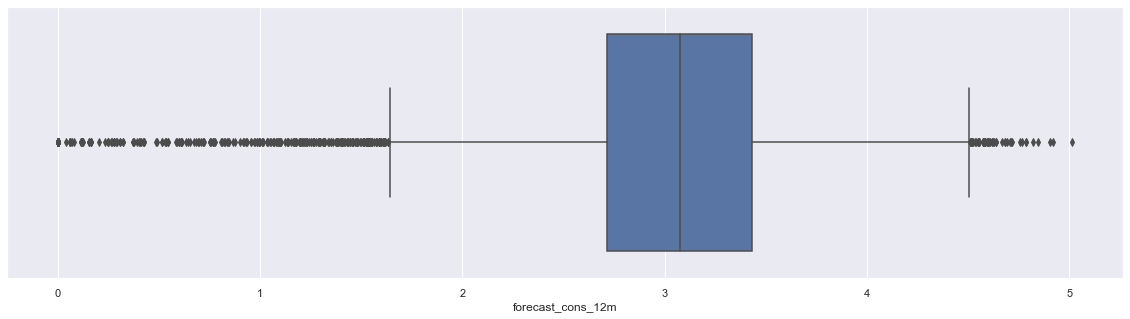

In [52]:
fig = plt.subplots( figsize=(20,5))
sns.boxplot((train_new["forecast_cons_12m"].dropna()))
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


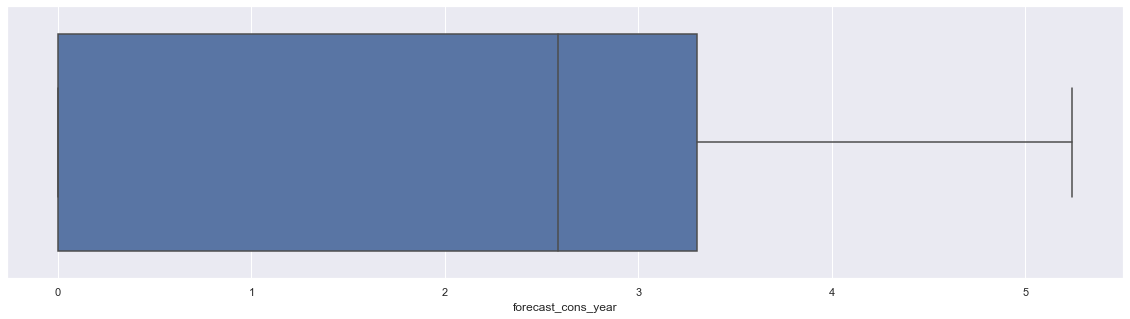

In [53]:
fig = plt.subplots( figsize=(20,5))
sns.boxplot((train_new["forecast_cons_year"].dropna()))
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


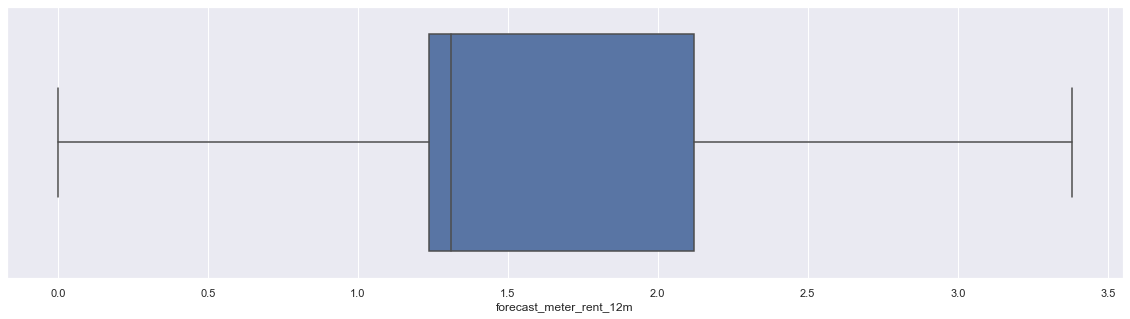

In [54]:
fig = plt.subplots( figsize=(20,5))
sns.boxplot((train_new["forecast_meter_rent_12m"].dropna()))
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


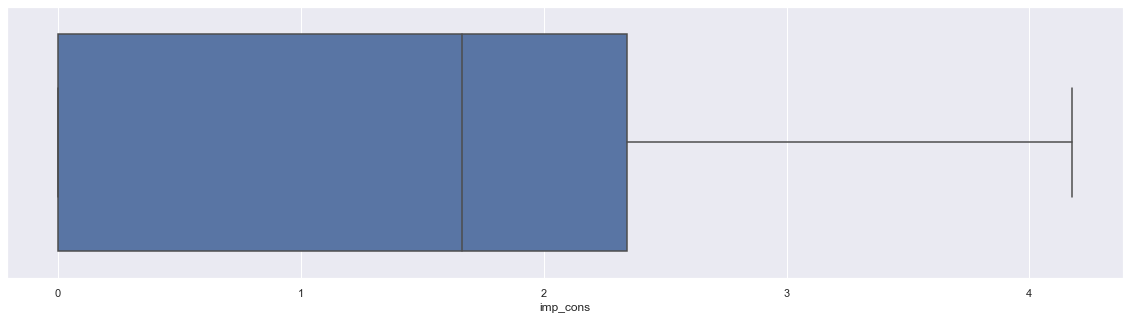

In [55]:
fig = plt.subplots( figsize=(20,5))
sns.boxplot((train_new["imp_cons"].dropna()))
plt.show()


In [56]:
train_new.describe()

,Unnamed: 0,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
count,16096.000000,0.0,16069.000000,16090.000000,16050.000000,3508.000000,3508.000000,3508.000000,3508.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,16096.000000,16069.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,8047.500000,NaN,4.283812,0.800300,2.359281,335.843857,335.843857,3837.441866,206.845165,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,0.184145,1.305021,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.005157,0.007393
std,4646.659302,NaN,0.915265,1.748833,1.789067,649.406000,649.406000,5425.744327,455.634288,0.709778,1.612963,5.160969,0.589394,0.026252,0.048617,5.212252,0.387615,1.165532,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.071626,0.085668
min,0.000000,NaN,0.000000,0.000000,0.000000,-364.940000,-364.940000,-2503.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,0.000000,0.000000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4023.750000,NaN,3.773786,0.000000,0.000000,0.000000,0.000000,1158.175000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8047.500000,NaN,4.187408,0.000000,2.959041,162.955000,162.955000,2187.230000,42.215000,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,0.000000,1.662380,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12071.250000,NaN,4.701508,0.000000,3.617000,396.185000,396.185000,4246.555000,228.117500,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,0.000000,2.341118,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16095.000000,NaN,7.206748,6.622052,6.656933,12566.080000,12566.080000,81122.630000,9682.890000,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,1.000000,4.177357,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# High correlation Variables

In [57]:
correlation = features.corr()

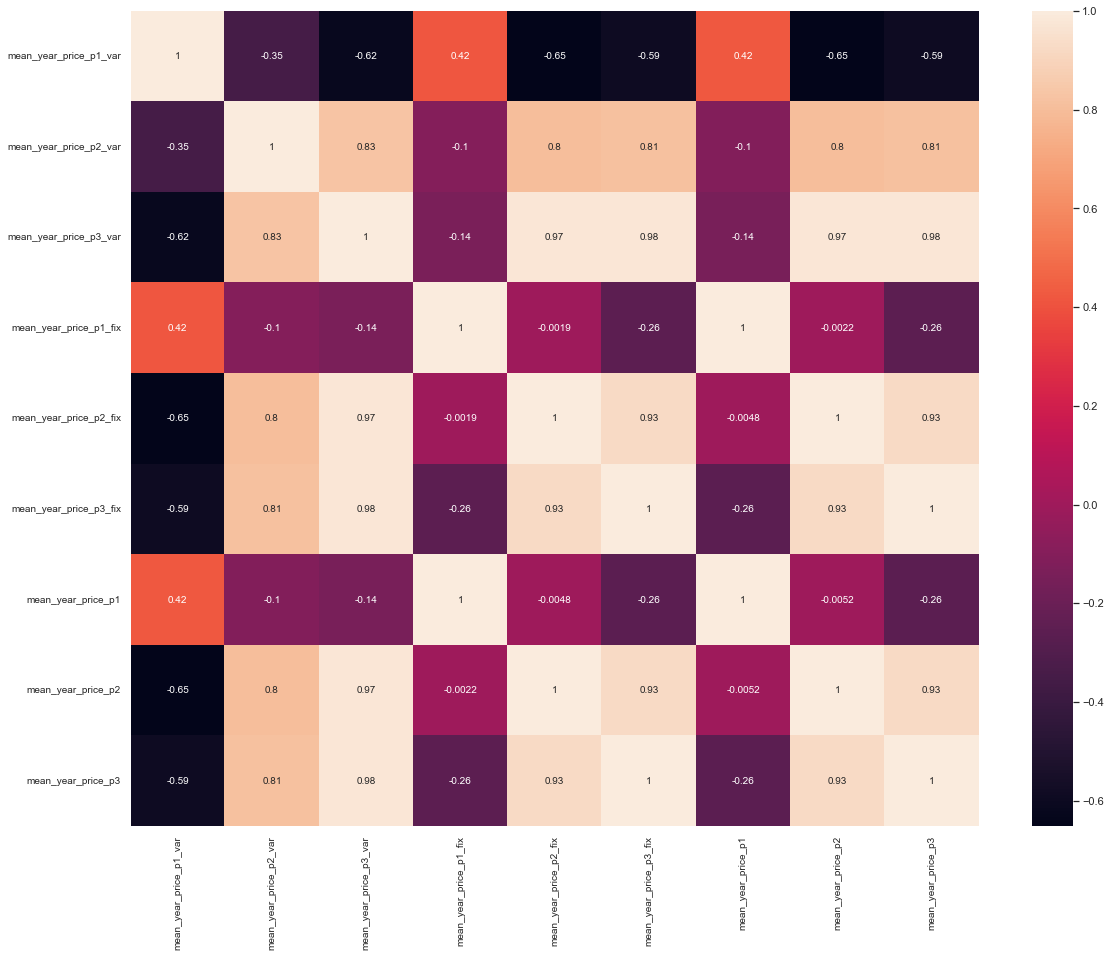

In [58]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [59]:
# Calculate correlation of variables
correlation = train_new.corr()

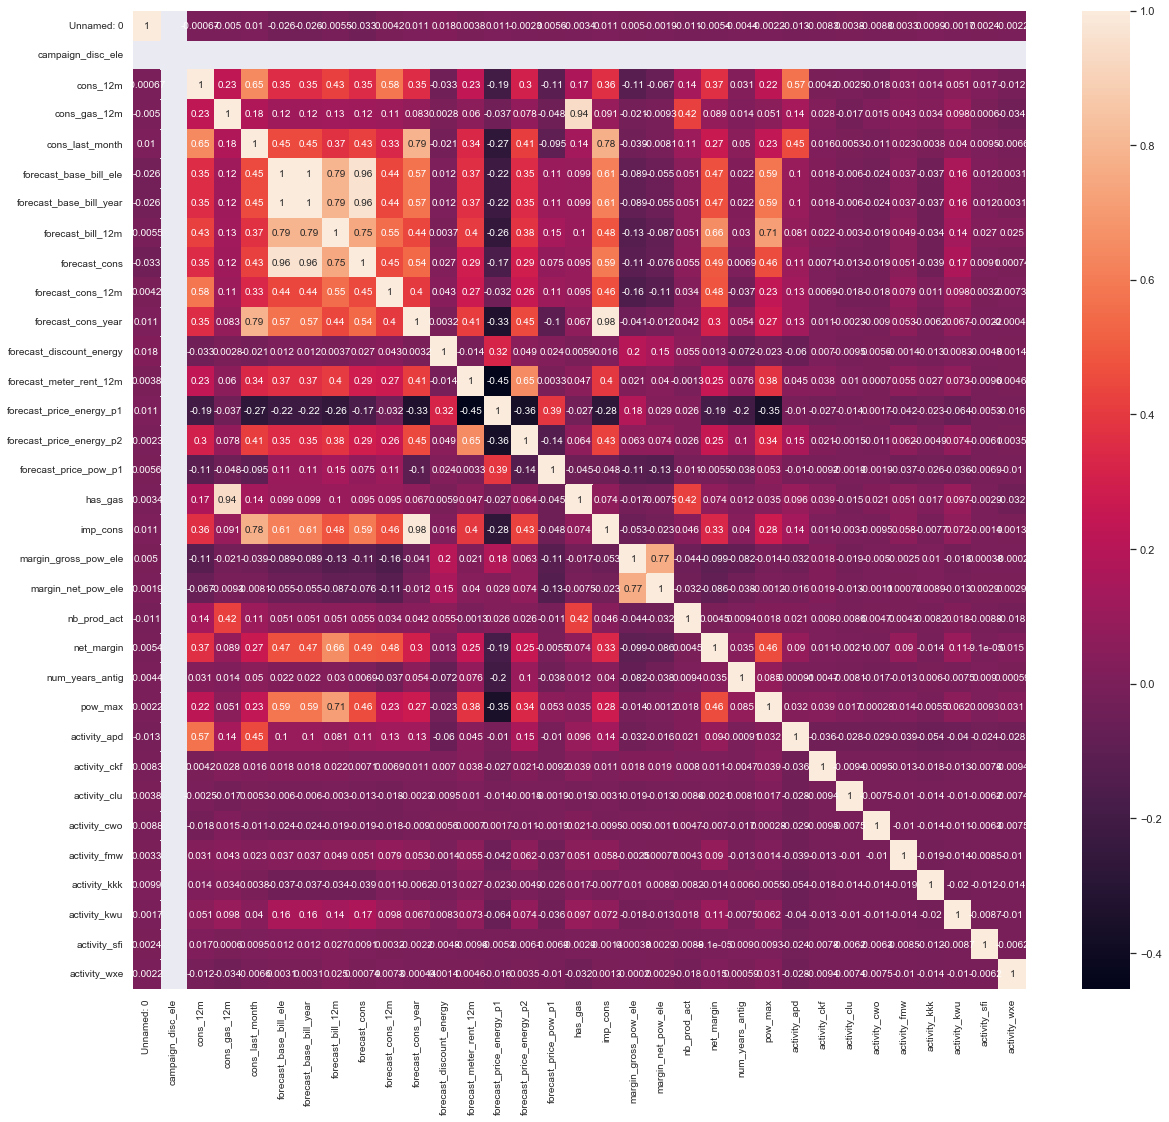

In [60]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [61]:
train_new.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

# Removing Outliers

In [62]:
def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [63]:
for c in features.columns:
    if c != "id":
        features = replace_outliers_z_score(features,c)

Replaced: 276  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 120  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 122  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [64]:
features.reset_index(drop=True, inplace=True)

In [65]:
def _find_outliers_iqr(dataframe, column):
    """
    Find outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column

    Returns
    -------
    Dict
        With the values of the iqr, lower_bound and upper_bound
    """
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results


In [66]:
def remove_outliers_iqr(dataframe, column):
    """
    Remove outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """

    outliers = _find_outliers_iqr(dataframe, column) 
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) | (dataframe[column] > outliers["upper_bound"])].shape

    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) & (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe


In [67]:
def remove_outliers_z_score(dataframe, column, Z=3):
    """
    Remove outliers using the Z score. Values with more than 3 are removed.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    dataframe["zscore"] = zscore(dataframe[column])

    removed = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape

    dataframe = dataframe[(dataframe["zscore"] > -Z) & (dataframe["zscore"] < Z)]

    print("Removed:", removed[0], " outliers of ", column)

    return dataframe.drop(columns="zscore")

In [68]:
def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    no_outliers = dataframe[column].isnull().sum()
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")


In [69]:
train = replace_outliers_z_score(train_new,"cons_12m")
train = replace_outliers_z_score(train_new,"cons_gas_12m")
train = replace_outliers_z_score(train_new,"cons_last_month")
train = replace_outliers_z_score(train_new,"forecast_cons_12m")
#train = replace_outliers_z_score(train,"forecast_cons_year")
train = replace_outliers_z_score(train_new,"forecast_discount_energy")
train = replace_outliers_z_score(train_new,"forecast_meter_rent_12m")
train = replace_outliers_z_score(train_new,"forecast_price_energy_p1")
train = replace_outliers_z_score(train_new,"forecast_price_energy_p2")
train = replace_outliers_z_score(train_new,"forecast_price_pow_p1")
train = replace_outliers_z_score(train_new,"imp_cons")
train = replace_outliers_z_score(train_new,"margin_gross_pow_ele")
train = replace_outliers_z_score(train_new,"margin_net_pow_ele")
train = replace_outliers_z_score(train_new,"net_margin")
train = replace_outliers_z_score(train_new,"pow_max")


Replaced: 27  outliers in  cons_12m
Replaced: 6  outliers in  cons_gas_12m
Replaced: 46  outliers in  cons_last_month
Replaced: 41  outliers in  forecast_cons_12m
Replaced: 126  outliers in  forecast_discount_energy
Replaced: 4  outliers in  forecast_meter_rent_12m
Replaced: 126  outliers in  forecast_price_energy_p1
Replaced: 126  outliers in  forecast_price_energy_p2
Replaced: 126  outliers in  forecast_price_pow_p1
Replaced: 27  outliers in  imp_cons
Replaced: 13  outliers in  margin_gross_pow_ele
Replaced: 13  outliers in  margin_net_pow_ele
Replaced: 15  outliers in  net_margin
Replaced: 3  outliers in  pow_max


# Pickling